# Importando as Bibliotecas e a Base de Dados

In [1029]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn import svm

# Tratando o Dataset para ser usado

In [902]:
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [903]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [904]:
#dataset['data'] # daset das features
#dataset['target'] # diagnósticos
#dataset['target_names'] # nomes dos diagnósticos
#dataset['DESCR'] # descrição do dataset 
#dataset['feature_names'] # nome das features

In [1021]:
dfData = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
dfTarget = pd.DataFrame(dataset['target'], columns = ['diagnosis'])

In [1022]:
dfData.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1023]:
dfTarget.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


In [908]:
from sklearn.model_selection import train_test_split

In [939]:
X_train, X_test, y_train, y_test = train_test_split(dfData, np.ravel(dfTarget), test_size=0.30, random_state = 1)

# colocando o random state para sempre que reexecutar gerar a mesma combinação aleatória de treino e teste

# Linear Kernel

In [910]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [911]:
svm = LinearSVC()
#svm.kernel = 'linear'

In [960]:
svm.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [961]:
pred  = svm.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

             precision    recall  f1-score   support

          0       0.52      1.00      0.68        63
          1       1.00      0.46      0.63       108

avg / total       0.82      0.66      0.65       171

[[63  0]
 [58 50]]


In [965]:
from sklearn.model_selection import GridSearchCV

paramGrid = {'C': [0.01, 0.1,1, 10, 100, 1000, 10000, 100000]}

In [966]:
grid = GridSearchCV(svm, paramGrid, verbose = 3, n_jobs = -1)

In [970]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.8195488721804511, total=   0.0s
[CV] ................. C=0.01, score=0.9323308270676691, total=   0.0s
[CV] .................. C=0.1, score=0.8721804511278195, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ................. C=0.01, score=0.8787878787878788, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] C=1 .............................................................
[CV] C=1 .............................................................
[CV] ................... C=0.1, score=0.924812030075188, total=   0.0s
[CV] ............

[Parallel(n_jobs=-1)]: Done   8 out of  24 | elapsed:    0.1s remaining:    0.2s


[CV] C=1000 ..........................................................
[CV] ................. C=1000, score=0.9545454545454546, total=   0.0s


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [971]:
print("Best params: ", grid.best_params_, end = "\n\n")
print("Best estimator: ", grid.best_estimator_, end = "\n\n")
print("Best score: ", grid.best_score_, end = "\n\n")

Best params:  {'C': 1000}

Best estimator:  LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Best score:  0.9321608040201005



In [972]:
gridPred = grid.predict(X_test)
print(classification_report(y_test, gridPred))
print(confusion_matrix(y_test, gridPred))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90        63
          1       0.95      0.93      0.94       108

avg / total       0.93      0.92      0.92       171

[[ 58   5]
 [  8 100]]


In [973]:
#grid.cv_results_

In [974]:
listaScore = []
listaC = []
for score, C in zip(grid.cv_results_['mean_test_score'], grid.cv_results_['param_C']):
    listaScore.append(score)
    listaC.append(C)

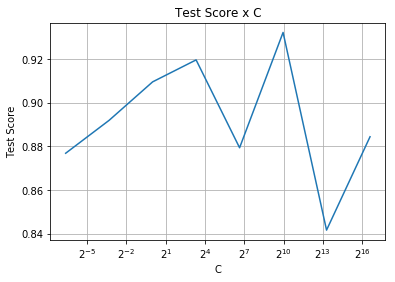

In [975]:
plt.subplot()
plt.loglog(listaC, listaScore, basex=2)
plt.grid(True)
plt.yscale("linear")
plt.xlabel("C")
plt.ylabel("Test Score")
plt.title("Test Score x C")
plt.show()

In [1024]:
from pandas.tools.plotting import scatter_matrix

result = pd.concat([dfData, dfTarget], axis=1, join_axes=[dfData.index])

result.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [1028]:
#p = sns.PairGrid(result, hue = "diagnosis")

In [978]:
#p.map(plt.hist);
#plt.show

# Gaussian Kernel

In [979]:
svmG = SVC()

In [980]:
svmG.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [981]:
predGaussian  = svmG.predict(X_test)
print(classification_report(y_test, predGaussian))
print(confusion_matrix(y_test, predGaussian))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        63
          1       0.63      1.00      0.77       108

avg / total       0.40      0.63      0.49       171

[[  0  63]
 [  0 108]]


In [982]:
from sklearn.model_selection import GridSearchCV

# sigma = 1/gamma

paramGridGaussian = {'C': [0.01, 0.1,1, 10, 100, 1000, 10000, 100000],
                    'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}

In [983]:
gridGaussian = GridSearchCV(svmG, paramGridGaussian, verbose = 3, n_jobs = -1)

In [984]:
gridGaussian.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] C=0.01, gamma=1000 ..............................................
[CV] C=0.01, gamma=1000 ..............................................
[CV] C=0.01, gamma=1000 ..............................................
[CV] C=0.01, gamma=100 ...............................................
[CV] ..... C=0.01, gamma=1000, score=0.6240601503759399, total=   0.0s
[CV] ..... C=0.01, gamma=1000, score=0.6240601503759399, total=   0.0s
[CV] ...... C=0.01, gamma=100, score=0.6240601503759399, total=   0.0s
[CV] ..... C=0.01, gamma=1000, score=0.6287878787878788, total=   0.0s
[CV] C=0.01, gamma=100 ...............................................
[CV] C=0.01, gamma=100 ...............................................
[CV] C=0.01, gamma=10 ................................................
[CV] ...... C=0.01, gamma=100, score=0.6240601503759399, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ....... C=

[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [985]:
print("Best params for gaussian kernel: ", gridGaussian.best_params_, end = "\n\n")
print("Best estimator for gaussian kernel: ", gridGaussian.best_estimator_, end = "\n\n")
print("Best score for gaussian kernel: ", gridGaussian.best_score_, end = "\n\n")

Best params for gaussian kernel:  {'C': 1000, 'gamma': 0.0001}

Best estimator for gaussian kernel:  SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best score for gaussian kernel:  0.9246231155778895



In [986]:
gridPredGaussian = gridGaussian.predict(X_test)
print(classification_report(y_test, gridPredGaussian))
print(confusion_matrix(y_test, gridPredGaussian))

             precision    recall  f1-score   support

          0       0.90      0.90      0.90        63
          1       0.94      0.94      0.94       108

avg / total       0.93      0.93      0.93       171

[[ 57   6]
 [  6 102]]


In [987]:
listaScoreG = []
listaCG = []
listaGammaG = []
dicio = {}
for score, C, gamma in zip(gridGaussian.cv_results_['mean_test_score'], gridGaussian.cv_results_['param_C'], gridGaussian.cv_results_['param_gamma']):
    if (score, gamma) not in dicio:
        listaScoreG.append(score)
        listaCG.append(C)
        listaGammaG.append(gamma)
        dicio[score, gamma] = 1
        #print(score, C, gamma)

In [988]:
#gridGaussian.cv_results_

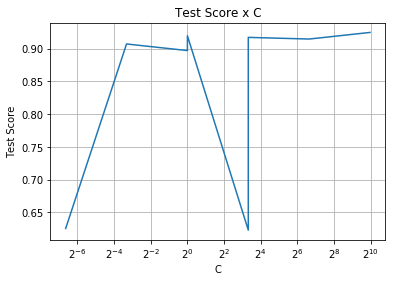

In [989]:
plt.subplot()
plt.loglog(listaCG, listaScoreG, basex=2)
plt.grid(True)
plt.yscale("linear")
plt.xlabel("C")
plt.ylabel("Test Score")
plt.title("Test Score x C")
plt.show()

# RBF Kernel

In [1207]:
svmRBF = SVC(kernel = 'rbf')

In [1208]:
svmRBF.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1209]:
predRBF  = svmRBF.predict(X_test)
print(classification_report(y_test, predRBF))
print(confusion_matrix(y_test, predRBF))

             precision    recall  f1-score   support

          0       1.00      0.75      0.85        63
          1       0.87      1.00      0.93       108

avg / total       0.92      0.91      0.90       171

[[ 47  16]
 [  0 108]]


In [1210]:
from pandas.tools.plotting import scatter_matrix

result = pd.concat([dfTarget,dfData], axis=1, join_axes=[dfData.index])

result.head(1)

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


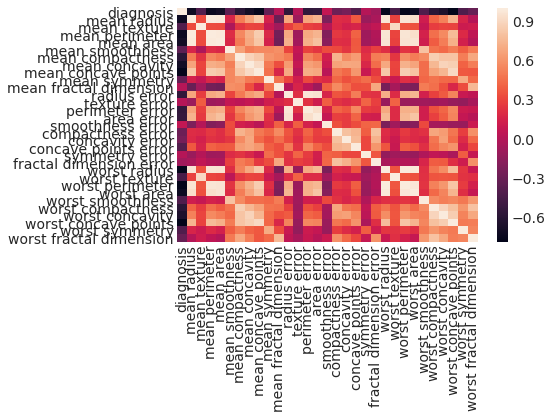

In [1241]:
corr = result.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)